In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
 
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/Man1ish/datarepo/master/finaldata_filter.csv")
columns_of_interest = ['total_memory', 'free_memory', 'available_memory', 'cache_memory',
       'swap_total_memory', 'app_total_memory', 'app_free_memory',
       'app_used_memory', 'no_of_processor', 'max_cpu_frequency', 'cputime','energy','time']
data_interest = data[columns_of_interest]
data_interest.describe()
data_interest.dropna(inplace=True)
data_interest['time'] = data_interest['time'] * 0.001
x = data_interest.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()

/home/manish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/manish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.037671,0.056911,0.060762,0.551868,0.092257,0.183784,0.063637,0.0,0.410788,0.001916,0.016142,0.008332
1,0.0,0.031097,0.052770,0.058365,0.551868,0.093296,0.184954,0.064591,0.0,0.411014,0.006060,0.013745,0.007271
2,0.0,0.023727,0.048485,0.056005,0.551868,0.093547,0.197595,0.061573,0.0,0.411014,0.009960,0.013994,0.007173
3,0.0,0.040865,0.051416,0.053675,0.551868,0.095138,0.195782,0.063981,0.0,0.411014,0.013837,0.013654,0.007223
4,0.0,0.048426,0.053687,0.053792,0.551868,0.094865,0.192570,0.064493,0.0,0.411014,0.017774,0.014361,0.007489


In [9]:
#### data_interest.fillna(data_interest.mean(), inplace=True)
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
clustering_kmeans.fit(df) 

/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(n_clusters=4, n_jobs=-1, precompute_distances='auto')

In [10]:
column = data["energy"]
max_index = column.idxmax()
max_index

2605

/home/manish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/manish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/manish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

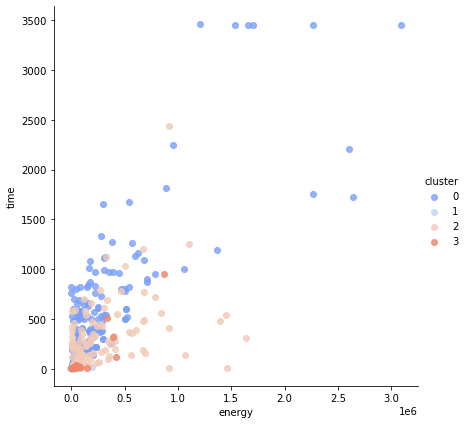

In [11]:
import seaborn as sns
data_interest["cluster"] = clustering_kmeans.labels_
data_interest["process"] = data["process"]
data_interest["energy"] = data["energy"]

sns.lmplot('energy','time',data=data_interest,hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [12]:
labels = clustering_kmeans.labels_
labels.size
labels

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [13]:
#Cluster 
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 1522, 1: 782, 2: 3547, 3: 1152}

In [15]:
labels

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [18]:
np.size(labels)

7003

In [20]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.037671,0.056911,0.060762,0.551868,0.092257,0.183784,0.063637,0.0,0.410788,0.001916,0.016142,0.008332
1,0.000000,0.031097,0.052770,0.058365,0.551868,0.093296,0.184954,0.064591,0.0,0.411014,0.006060,0.013745,0.007271
2,0.000000,0.023727,0.048485,0.056005,0.551868,0.093547,0.197595,0.061573,0.0,0.411014,0.009960,0.013994,0.007173
3,0.000000,0.040865,0.051416,0.053675,0.551868,0.095138,0.195782,0.063981,0.0,0.411014,0.013837,0.013654,0.007223
4,0.000000,0.048426,0.053687,0.053792,0.551868,0.094865,0.192570,0.064493,0.0,0.411014,0.017774,0.014361,0.007489
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6998,0.359379,0.603913,0.402434,0.259181,1.000000,0.053112,0.070859,0.045817,0.0,0.976655,0.381460,0.005240,0.000733
6999,0.359379,0.605666,0.402942,0.259182,1.000000,0.052712,0.092854,0.039553,0.0,0.978186,0.382428,0.005338,0.000743
7000,0.359379,0.609946,0.404217,0.259241,1.000000,0.052660,0.072783,0.044763,0.0,0.978186,0.383387,0.005525,0.000745
7001,0.359379,0.606779,0.403559,0.259512,1.000000,0.052274,0.058785,0.047972,0.0,0.967853,0.384352,0.005384,0.000736


In [22]:
df['labels'] = labels

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,labels
0,0.000000,0.037671,0.056911,0.060762,0.551868,0.092257,0.183784,0.063637,0.0,0.410788,0.001916,0.016142,0.008332,2
1,0.000000,0.031097,0.052770,0.058365,0.551868,0.093296,0.184954,0.064591,0.0,0.411014,0.006060,0.013745,0.007271,2
2,0.000000,0.023727,0.048485,0.056005,0.551868,0.093547,0.197595,0.061573,0.0,0.411014,0.009960,0.013994,0.007173,2
3,0.000000,0.040865,0.051416,0.053675,0.551868,0.095138,0.195782,0.063981,0.0,0.411014,0.013837,0.013654,0.007223,2
4,0.000000,0.048426,0.053687,0.053792,0.551868,0.094865,0.192570,0.064493,0.0,0.411014,0.017774,0.014361,0.007489,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6998,0.359379,0.603913,0.402434,0.259181,1.000000,0.053112,0.070859,0.045817,0.0,0.976655,0.381460,0.005240,0.000733,3
6999,0.359379,0.605666,0.402942,0.259182,1.000000,0.052712,0.092854,0.039553,0.0,0.978186,0.382428,0.005338,0.000743,3
7000,0.359379,0.609946,0.404217,0.259241,1.000000,0.052660,0.072783,0.044763,0.0,0.978186,0.383387,0.005525,0.000745,3
7001,0.359379,0.606779,0.403559,0.259512,1.000000,0.052274,0.058785,0.047972,0.0,0.967853,0.384352,0.005384,0.000736,3


In [25]:
data['label'] = labels

In [26]:
data

,total_memory,free_memory,available_memory,cache_memory,swap_total_memory,app_total_memory,app_free_memory,app_used_memory,no_of_processor,max_cpu_frequency,cputime,current,voltage,process,time,energy,Device,label
0,2859376,71864.248276,615.010345,5.583312e+05,2097148,1.598477e+07,5.391897e+06,1.059287e+07,8,1.804403e+06,2128.275862,-297.782759,4151.0,20,32246,39859.159066,a30,2
1,2859376,66039.667925,602.743396,5.517279e+05,2097148,1.612003e+07,5.424862e+06,1.069516e+07,8,1.804800e+06,5666.335849,-273.252830,4151.0,20,28574,32410.702361,a30,2
2,2859376,59510.977099,590.045802,5.452225e+05,2097148,1.615263e+07,5.781105e+06,1.037152e+07,8,1.804800e+06,8996.606870,-283.538168,4145.0,20,28236,33184.802478,a30,2
3,2859376,74693.338403,598.730038,5.388005e+05,2097148,1.635974e+07,5.730012e+06,1.062973e+07,8,1.804800e+06,12307.768061,-272.840304,4145.0,20,28408,32127.262312,a30,2
4,2859376,81391.780220,605.457875,5.391255e+05,2097148,1.632419e+07,5.639501e+06,1.068469e+07,8,1.804800e+06,15669.516484,-282.336996,4145.0,20,29329,34323.343018,a30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6998,5713048,573497.333333,1638.719298,1.105143e+06,2621436,1.089126e+07,2.209719e+06,8.681544e+06,8,2.800505e+06,326231.947368,234.526316,4295.0,20,5941,5984.313017,s9plus,3
6999,5713048,575049.586207,1640.224138,1.105143e+06,2621436,1.083931e+07,2.829533e+06,8.009779e+06,8,2.803200e+06,327058.034483,245.103448,4295.0,20,5975,6289.997879,s9plus,3
7000,5713048,578841.964912,1644.000000,1.105308e+06,2621436,1.083247e+07,2.263915e+06,8.568556e+06,8,2.803200e+06,327877.543860,267.421053,4295.0,20,5982,6870.766205,s9plus,3
7001,5713048,576035.578947,1642.052632,1.106054e+06,2621436,1.078223e+07,1.869471e+06,8.912759e+06,8,2.785011e+06,328701.368421,251.631579,4295.0,20,5951,6431.588666,s9plus,3


In [32]:
label = 4
label0 = data[data['label'] == 0]
label0.to_csv('filter/cluster4/cat0.csv')

label1 = data[data['label'] == 1]
label1.to_csv('filter/cluster4/cat1.csv')

label2 = data[data['label'] == 2]
label2.to_csv('filter/cluster4/cat2.csv')

label3 = data[data['label'] == 3]
label3.to_csv('filter/cluster4/cat3.csv')
